In [1]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np
from Energy_Models.bert import Bert


In [2]:
df = pd.read_csv("C:\\Users\\delll\\Downloads\\energydata_complete.csv",index_col="date")

In [3]:
scaler = MinMaxScaler().fit(df)
df    = pd.DataFrame(scaler.transform(df))

X = df.iloc[:,1:]
y = df.iloc[:,0]

In [4]:
from sklearn.model_selection import train_test_split
X_train ,X_test ,y_train ,y_test=train_test_split(X ,y ,test_size=0.30,random_state=35)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.50, random_state=42)
X_train = np.array(X_train)
X_test  = np.array(X_test)

In [5]:
X_train.shape ,X_test.shape ,y_train.shape ,y_test.shape

((13814, 27), (2961, 27), (13814,), (2961,))

In [6]:
X_val = np.array(X_val)

In [7]:
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test  = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

X_val = X_val.reshape(X_val.shape[0],1,X_val.shape[1])

In [8]:
X_train.shape ,X_test.shape 

((13814, 1, 27), (2961, 1, 27))

In [9]:
def root_mean_squared_error(y_true, y_pred):    
    return np.sqrt(mean_squared_error(y_true, y_pred))
model=Bert(1,27,1).getModel()

In [10]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)

In [11]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1, 27)]      0           []                               
                                                                                                  
 token_embedding_1 (TokenEmbedd  (None, 1, 32)       864         ['input_1[0][0]']                
 ing)                                                                                             
                                                                                                  
 encoder_1 (Encoder)            (None, 1, 32)        5312        ['token_embedding_1[0][0]']      
                                                                                                  
 tf.__operators__.getitem (Slic  (None, 32)          0           ['encoder_1[0][0]']          

In [12]:
model.compile(optimizer='adam', loss ='mse')
history = model.fit(X_train , y_train, epochs=100, batch_size=64, verbose= 1,validation_split=0.2,callbacks=callback)

Epoch 1/100
173/173 [==============================] - 14s 38ms/step - loss: 0.0142 - val_loss: 0.0102
Epoch 2/100
173/173 [==============================] - 6s 33ms/step - loss: 0.0094 - val_loss: 0.0089
Epoch 3/100
173/173 [==============================] - 8s 44ms/step - loss: 0.0089 - val_loss: 0.0084
Epoch 4/100
173/173 [==============================] - 7s 38ms/step - loss: 0.0088 - val_loss: 0.0090
Epoch 5/100
173/173 [==============================] - 6s 36ms/step - loss: 0.0086 - val_loss: 0.0103
Epoch 6/100
173/173 [==============================] - 7s 39ms/step - loss: 0.0085 - val_loss: 0.0089
Epoch 7/100
173/173 [==============================] - 7s 38ms/step - loss: 0.0085 - val_loss: 0.0078
Epoch 8/100
173/173 [==============================] - 6s 33ms/step - loss: 0.0082 - val_loss: 0.0097
Epoch 9/100
173/173 [==============================] - 6s 34ms/step - loss: 0.0082 - val_loss: 0.0094
Epoch 10/100
173/173 [==============================] - 6s 37ms/step - loss: 0.00

173/173 [==============================] - 6s 32ms/step - loss: 0.0061 - val_loss: 0.0072
Epoch 81/100
173/173 [==============================] - 5s 30ms/step - loss: 0.0060 - val_loss: 0.0071
Epoch 82/100
173/173 [==============================] - 5s 30ms/step - loss: 0.0060 - val_loss: 0.0082
Epoch 83/100
173/173 [==============================] - 7s 40ms/step - loss: 0.0061 - val_loss: 0.0072
Epoch 84/100
173/173 [==============================] - 7s 38ms/step - loss: 0.0061 - val_loss: 0.0072
Epoch 85/100
173/173 [==============================] - 9s 54ms/step - loss: 0.0060 - val_loss: 0.0069
Epoch 86/100
173/173 [==============================] - 7s 41ms/step - loss: 0.0061 - val_loss: 0.0070
Epoch 87/100
173/173 [==============================] - 7s 40ms/step - loss: 0.0060 - val_loss: 0.0081
Epoch 88/100
173/173 [==============================] - 7s 43ms/step - loss: 0.0061 - val_loss: 0.0071
Epoch 89/100
173/173 [==============================] - 7s 42ms/step - loss: 0.0061 - 

In [13]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error, mean_absolute_percentage_error
def root_mean_squared_error(y_true, y_pred):    
    return np.sqrt(mean_squared_error(y_true, y_pred))
def root_mean_squared_log_error(real, predicted):
    sum=0.0
    for x in range(len(predicted)):
        if predicted[x]<0 or real[x]<0: # check for negative values
            continue
        p = np.log(predicted[x]+1)
        r = np.log(real[x]+1)
        sum = sum + (p - r)**2
    return (sum/len(predicted))**0.5
def print_metrics():
    print('Train   RMSE  value   : %.3f ' % root_mean_squared_error(y_train, model.predict(X_train)))
    print('Train   MSE   value   : %.3f ' % mean_squared_error(y_train, model.predict(X_train)))
    print('Train   R2    value   : %.3f ' % r2_score(y_train,model.predict(X_train)))
    print('Train   MAPE  value   : %.3f ' % mean_absolute_percentage_error(y_train, model.predict(X_train)))
    print('Train   MAE   value   : %.3f ' % mean_absolute_error(y_train, model.predict(X_train)))
    print('---------------------------------------------')
    print('Test    RMSE  value   : %.3f ' % root_mean_squared_error(y_test, model.predict(X_test)))
    print('Test    MSE   value   : %.3f ' % mean_squared_error(y_test, model.predict(X_test)))
    print('Test    R2    value   : %.3f ' % r2_score(y_test, model.predict(X_test)))
    print('Test    MAPE  value   : %.3f ' % mean_absolute_percentage_error(y_test, model.predict(X_test)))
    print('Test    MAE   value   : %.3f ' % mean_absolute_error(y_test, model.predict(X_test)))

In [14]:
print_metrics()

432/432 [==============================] - 4s 8ms/step
Train   RMSE  value   : 0.077 
432/432 [==============================] - 3s 7ms/step
Train   MSE   value   : 0.006 
432/432 [==============================] - 3s 7ms/step
Train   R2    value   : 0.358 
432/432 [==============================] - 3s 7ms/step
Train   MAPE  value   : 132476879909.173 
432/432 [==============================] - 3s 8ms/step
Train   MAE   value   : 0.048 
---------------------------------------------
93/93 [==============================] - 1s 8ms/step
Test    RMSE  value   : 0.082 
93/93 [==============================] - 1s 7ms/step
Test    MSE   value   : 0.007 
93/93 [==============================] - 1s 10ms/step
Test    R2    value   : 0.207 
93/93 [==============================] - 1s 9ms/step
Test    MAPE  value   : 0.895 
93/93 [==============================] - 1s 7ms/step
Test    MAE   value   : 0.051 


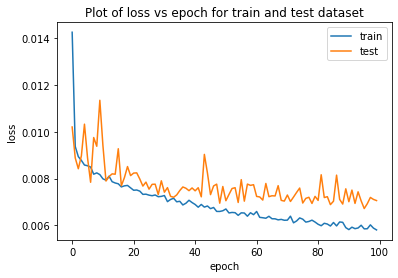

In [15]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()